# ENV/ATM 415: Climate Laboratory

[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany

# Lecture 15: Heat transport

____________
<a id='section1'></a>

## 1. Spatial patterns of insolation and surface temperature
____________

Let's take a look at seasonal and spatial pattern of insolation and compare this to the zonal average surface temperatures.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import climlab
from climlab import constants as const

In [2]:
#  Calculate daily average insolation as function of latitude and time of year
lat = np.linspace( -90., 90., 500 )
days = np.linspace(0, const.days_per_year, 365 )
Q = climlab.solar.insolation.daily_insolation( lat, days )

In [3]:
#  daily surface temperature from  NCEP reanalysis
# The NOAA ESRL server is shutdown! January 2019
#ncep_url = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/"
#ncep_temp = xr.open_dataset( ncep_url + "surface_gauss/skt.sfc.day.1981-2010.ltm.nc", decode_times=False)
url = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/Reanalysis_Data/NCEP/NCEP/clima/'
ncep_temp = xr.open_dataset(url + 'surface_gauss/skt') + const.tempCtoK  # different units!
ncep_temp_zon = ncep_temp.skt.mean(dim='lon')

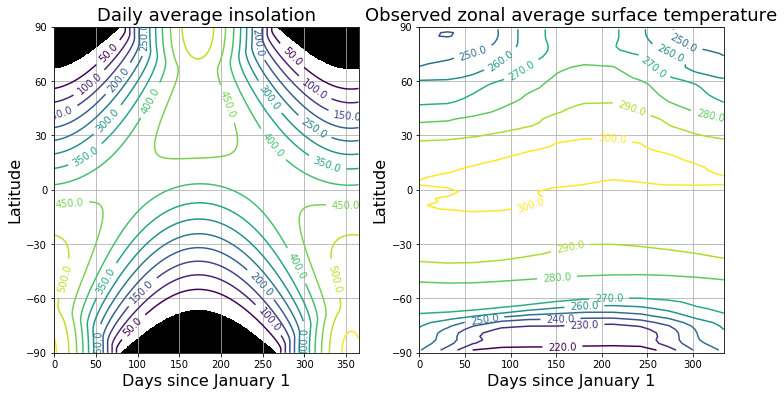

In [4]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121)
CS = ax1.contour( days, lat, Q , levels = np.arange(0., 600., 50.) )
ax1.clabel(CS, CS.levels, inline=True, fmt='%r', fontsize=10)
ax1.set_title('Daily average insolation', fontsize=18 )
ax1.contourf ( days, lat, Q, levels=[-100., 0.], colors='k' )

ax2 = fig.add_subplot(122)
#CS = ax2.contour( (ncep_temp.time - ncep_temp.time[0])/const.hours_per_day, ncep_temp.lat, 
#                 ncep_temp_zon.transpose(), levels=np.arange(210., 310., 10.) )
#  time format is different in the new reanalysis files
CS = ax2.contour( (ncep_temp.time - ncep_temp.time[0])/const.seconds_per_day/1E9, ncep_temp.lat, 
                 ncep_temp_zon.transpose(), levels=np.arange(210., 310., 10.) )
ax2.clabel(CS, CS.levels, inline=True, fmt='%r', fontsize=10)
ax2.set_title('Observed zonal average surface temperature', fontsize=18 )

for ax in [ax1,ax2]:
    ax.set_xlabel('Days since January 1', fontsize=16 )
    ax.set_ylabel('Latitude', fontsize=16 )
    ax.set_yticks([-90,-60,-30,0,30,60,90])
    ax.grid()

This figure reveals something fairly obvious, but still worth thinking about:

**Warm temperatures are correlated with high insolation**. It's warm where the sun shines.

More specifically, we can see a few interesting details here:

- The seasonal cycle is weakest in the tropics and strongest in the high latitudes.
- The warmest temperatures occur slighly NORTH of the equator
- The highest insolation occurs at the poles at summer solstice.

The local surface temperature does not correlate perfectly with local insolation for two reasons:

- the climate system has heat capacity, which buffers some of the seasonal variations
- the climate system moves energy around in space!

## A reminder: the climate system is made of fluids, and they move!

Let's take another look at the animation of Sea Level Pressure from the CESM simulation:

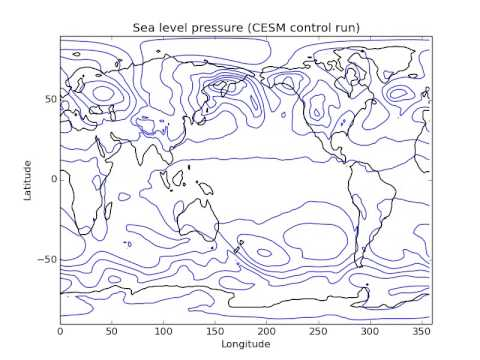

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('As85L34fKYQ')

From your reading, what are various mechanisms by which the climate system moves energy from one part of the planet to another?

____________
<a id='section3'></a>

## 3. Energy budget of an isolated column
____________


For most of this course we have been thinking about **global averages**.

We've been working with an enerby budget that looks something like this:

![column sketch](http://www.atmos.albany.edu/facstaff/brose/classes/ENV415_Spring2018/images/column_sketch.pdf)

When we start thinking about regional climates, we need to modify our budget to account for the **additional heating or cooling** due to **transport** in and out of the column:

![column sketch 2](http://www.atmos.albany.edu/facstaff/brose/classes/ENV415_Spring2018/images/column_sketch2.pdf)

Conceptually, the additional energy source is the difference between what's coming in and what's going out:

$$ h = \mathcal{H}_{in}  - \mathcal{H}_{out} $$

where $h$ is a **dynamic heating rate** in W m$^{-2}$.

### The top-of-atmosphere imbalance

Let's plot the TOA fluxes ASR and OLR as a function of latitude. We can look at both observational values (we'll use the NCEP Reanalysis) and modeled values from the CESM.

In [6]:
# Get TOA radiative flux data from NCEP reanalysis
# downwelling SW
#dswrf = xr.open_dataset(ncep_url + '/other_gauss/dswrf.ntat.mon.1981-2010.ltm.nc', decode_times=False)
dswrf = xr.open_dataset(url + '/other_gauss/dswrf')
#  upwelling SW
#uswrf = xr.open_dataset(ncep_url + '/other_gauss/uswrf.ntat.mon.1981-2010.ltm.nc', decode_times=False)
uswrf = xr.open_dataset(url + '/other_gauss/uswrf')
#  upwelling LW
#ulwrf = xr.open_dataset(ncep_url + '/other_gauss/ulwrf.ntat.mon.1981-2010.ltm.nc', decode_times=False)
ulwrf = xr.open_dataset(url + '/other_gauss/ulwrf')

In [7]:
ASR_ncep = dswrf.dswrf - uswrf.uswrf
OLR_ncep = ulwrf.ulwrf

In [8]:
ASR_ncep_zon = ASR_ncep.mean(dim=('time','lon'))
OLR_ncep_zon = OLR_ncep.mean(dim=('time','lon'))

In [9]:
#  same thing from CESM control simulation
datapath = "http://ramadda.atmos.albany.edu:8080/repository/opendap/Top/Users/BrianRose/CESM_runs/"
endstr = "/entry.das"
atm_control = xr.open_dataset( datapath + 'som_control/som_control.cam.h0.clim.nc' + endstr, decode_times=False)
atm_2xCO2 = xr.open_dataset( datapath + 'som_2xCO2/som_2xCO2.cam.h0.clim.nc' + endstr, decode_times=False)

In [10]:
ASR_cesm = atm_control.FSNT
OLR_cesm = atm_control.FLNT

In [11]:
ASR_cesm_zon = ASR_cesm.mean(dim=('lon','time'))
OLR_cesm_zon = OLR_cesm.mean(dim=('lon','time'))

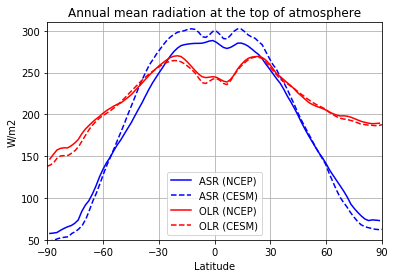

In [12]:
ticks = [-90, -60, -30, 0, 30, 60, 90]
fig, ax = plt.subplots()
ax.plot(ASR_ncep_zon.lat, ASR_ncep_zon, color='b', linestyle='-', label='ASR (NCEP)')
ax.plot(ASR_cesm_zon.lat, ASR_cesm_zon, color='b', linestyle='--', label='ASR (CESM)')
ax.plot(OLR_ncep_zon.lat, OLR_ncep_zon, color='r', linestyle='-', label='OLR (NCEP)')
ax.plot(OLR_cesm_zon.lat, OLR_cesm_zon, color='r', linestyle='--', label='OLR (CESM)')
ax.set_ylabel('W/m2')
ax.set_xlabel('Latitude')
ax.set_xlim(-90,90); ax.set_ylim(50,310)
ax.set_xticks(ticks);
ax.set_title('Annual mean radiation at the top of atmosphere')
ax.legend(); ax.grid();

We find that **ASR does not balance OLR in most locations**. 

Across the tropics the absorbed solar radiation exceeds the longwave emission to space.  The tropics have a **net gain of energy by radiation**.

The opposite is true in mid- to high latitudes: **the Earth is losing energy by net radiation to space** at these latitudes.

There are two locations where ASR = OLR, near about 35º in both hemispheres. 

The CESM simulation agrees fairly well (not perfectly) with the observations here.

The idea of looking at this imbalance is this:

**If we assume that the climate system is near equilibrium everywhere, then the local radiative imbalance must be compensated by heat transport!**

____________
<a id='section4'></a>

## 4. The energy budget for a zonal band
____________

Let’s now consider a thin band of the climate system stretching from latitude $\phi$ to $\phi + \delta \phi$, and write down a careful energy budget for it.

<img src="http://www.atmos.albany.edu/facstaff/brose/classes/ENV415_Spring2018/images/ZonalEnergyBudget_sketch.png" width="400">

Let $\mathcal{H}(\phi)$ be the total rate of northward energy transport across the latitude line $\phi$, measured in Watts (usually PW).

The dynamic heating rate looks like

$$ h = \frac{\text{transport in} - \text{transport out}}{\text{area of band}} $$

The transport into the band is $\mathcal{H}(\phi)$, and the transport out is just $\mathcal{H}(\phi + \delta \phi)$

The surface area of the latitude band is

$$ A = \text{Circumference} ~\times ~ \text{north-south width} $$

$$ A = 2 \pi a \cos \phi  ~ \times ~  a \delta \phi  $$

$$ A = 2 \pi a^2  \cos⁡\phi ~ \delta\phi $$

So we can write the heating rate as

\begin{align*}
h &= \frac{\mathcal{H}(\phi) - \mathcal{H}(\phi+\delta\phi)}{2 \pi a^2  \cos⁡\phi ~ \delta\phi} \\
 &= -\frac{1}{2 \pi a^2  \cos⁡\phi} \left( \frac{\mathcal{H}(\phi+\delta\phi) - \mathcal{H}(\phi)}{\delta\phi} \right)
\end{align*}

Writing it this way, we can see that if the width of the band $\delta \phi$ becomes very small, then the quantity in parentheses is simply the derivative $d\mathcal{H}/d\phi$.

The **dynamical heating rate** in W m$^{-2}$ is thus

$$ h = - \frac{1}{2 \pi a^2  \cos⁡\phi } \frac{\partial \mathcal{H}}{\partial \phi} $$

which is the **convergence of energy transport** into this latitude band: the difference between what's coming in and what's going out.

### Calculating heat transport from the steady-state energy budget

If we can **assume that the budget is balanced**, i.e. assume that the system is at equilibrium and there is negligible heat storage, then we can use the budget to infer $\mathcal{H}$ from a measured (or modeled) TOA radiation imbalance.

$$ \frac{\partial \mathcal{H}}{\partial \phi}  = 2 \pi ~a^2  \cos⁡\phi ~ \left( \text{ASR} - \text{OLR} \right)  = 2 \pi ~a^2  \cos⁡\phi ~ R_{TOA} $$

Now integrate from the South Pole ($\phi = -\pi/2$):

$$ \int_{-\pi/2}^{\phi} \frac{\partial \mathcal{H}}{\partial \phi^\prime}  d\phi^\prime = 2 \pi ~a^2 \int_{-\pi/2}^{\phi} \cos⁡\phi^\prime ~ R_{TOA} d\phi^\prime  $$

$$ \mathcal{H}(\phi) - \mathcal{H}(-\pi/2) = 2 \pi ~a^2 \int_{-\pi/2}^{\phi} \cos⁡\phi^\prime ~ R_{TOA} d\phi^\prime  $$

Our boundary condition is that the transport must go to zero at the pole. We therefore have a formula for calculating the heat transport at any latitude, by integrating the imbalance from the South Pole:

$$ \mathcal{H}(\phi) = 2 \pi ~a^2 \int_{-\pi/2}^{\phi} \cos⁡\phi^\prime ~ R_{TOA} d\phi^\prime  $$

This is an integral of the radiation imbalance weighted by cosine of latitude. In other words, this is **proportional to the area-weighted global average energy imbalance**.

We started by assuming that this imbalance is zero.

If the **global budget is balanced**, then the physical boundary condition of no-flux at the poles is satisfied.

____________
<a id='section5'></a>

## 5. Observed and modeled poleward heat transport
____________



Here we will code up a function that performs the above integration.

In [13]:
def inferred_heat_transport(energy_in, lat=None, latax=None):
    '''Compute heat transport as integral of local energy imbalance.
    Required input:
        energy_in: energy imbalance in W/m2, positive in to domain
    As either numpy array or xarray.DataArray
    If using plain numpy, need to supply these arguments:
        lat: latitude in degrees
        latax: axis number corresponding to latitude in the data
            (axis over which to integrate)
    returns the heat transport in PW.
    Will attempt to return data in xarray.DataArray if possible.
    '''
    from scipy import integrate
    from climlab import constants as const
    if lat is None:
        try: lat = energy_in.lat
        except:
            raise InputError('Need to supply latitude array if input data is not self-describing.')
    lat_rad = np.deg2rad(lat)
    coslat = np.cos(lat_rad)
    field = coslat*energy_in
    if latax is None:
        try: latax = field.get_axis_num('lat')
        except:
            raise ValueError('Need to supply axis number for integral over latitude.')
    #  result as plain numpy array
    integral = integrate.cumtrapz(field, x=lat_rad, initial=0., axis=latax)
    result = (1E-15 * 2 * np.math.pi * const.a**2 * integral)
    if isinstance(field, xr.DataArray):
        result_xarray = field.copy()
        result_xarray.values = result
        return result_xarray
    else:
        return result

Let's now use this to calculate the total northward heat transport from our control simulation with the CESM:

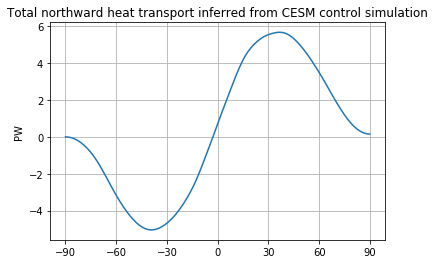

In [14]:
fig, ax = plt.subplots()
ax.plot(ASR_cesm_zon.lat, inferred_heat_transport(ASR_cesm_zon - OLR_cesm_zon))
ax.set_ylabel('PW')
ax.set_xticks(ticks)
ax.grid()
ax.set_title('Total northward heat transport inferred from CESM control simulation');

The total heat transport is very nearly symmetric about the equator, with poleward transport of about 5 to 6 PW in both hemispheres.

The transport peaks in magnitude near 35º latitude, the same latitude where we found that ASR = OLR. This is no coincidence!

Equatorward of 35º (across the tropics) there is **net heating by radiation** and **net cooling by dynamics**. The opposite is true poleward of 35º.

## Atmospheric and oceanic components of the heat transport, from observations

<img src="http://www.atmos.albany.edu/facstaff/brose/classes/ENV415_Spring2018/images/Trenberth_HeatTransport.pdf" width="800">

Discuss. What do you see here?

____________
<a id='section5'></a>

## 5. Parameterizing the heat transport for simple models
____________

The most important role for heat transport by winds and ocean currents is to more energy from where it’s WARM to where it’s COLD, thereby reducing the temperature gradient (equator to pole) from what it would be if the planet were in radiative equilibrium everywhere with no north-south motion.

This is the basis for the **parameterization of heat transport** often used in simple models: modeling heat transport as a **diffusion** process.

We're basically going to assume that motion is random stirring, which acts to conduct heat like a metal rod stuck in a fire.

We will use this analogy to build a simple parameterize to represent the net, statistical effect of all the north-south motion of air and water

### The temperature diffusion parameterization

The temperature gradient is the rate of change of temperature with distance. In simple models we usually limit ourselves to the average temperature of latitude bands, so the gradient refers to the north-south direction, $\partial T/\partial \phi$.

This measures how quickly the temperature decreases as we move northward
(negative in NH, positive in SH)

In any conduction or diffusion process, the flux (transport) of a quantity is always DOWN-gradient  (from WARM to COLD).

So our parameterization will look like

$$ \mathcal{H}(\phi) \propto -\frac{\partial T}{\partial \phi} $$

More specifically we'll write

$$ \mathcal{H}(\phi) = -2 \pi ~a^2 \cos\phi D \frac{\partial T}{\partial \phi} $$

Where $D$ is some positive number, the *thermal diffusivity of the climate system*. 

Because this is a parameterization, we have just introduced a parameter $D$. We need to choose a value for $D$. We will do this by matching to observations. In other words, we will **tune our model** to get the correct result.

We will do this in more detail next time. But let’s take a quick look at numbers:

Observed surface temperatures (zonal, annual means):

- $T_s = 20^\circ$C at 30$^\circ$ latitude
- $T_s = 0^\circ$C at 60$^\circ$ latitude

Solving for $D$:

$$ D = -\frac{\mathcal{H}(\phi)}{2 \pi ~a^2 \cos\phi ~\frac{\partial T}{\partial \phi}} $$

Plug in numbers for mid-latitudes:

gives about $D = 1$ W m$^{-2}$ $^\circ$C$^{-1}$.

Next time we will use this parameterization to build a simple Energy Balance Model that represents the equator-to-pole temperature gradient.